<a href="https://colab.research.google.com/github/MrBCPT/Project2-Part1Core/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Satish Byrow

#**1. Goal**
- Predict which features would most likely result in a stroke

##Dictionary
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br><br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

#**2. Import and Loading**


## Load Libraries

In [102]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import some necessary tools
from sklearn import preprocessing

from sklearn import set_config
set_config(transform_output='pandas')

## Load Functions

In [103]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [104]:
#Bivariate Analysis
def dist_box_plot(data, features):
    fig,axes= plt.subplots(nrows=3, ncols=2, figsize=(10,9))

    for i, cols in enumerate(features):
       sns.histplot(data=data,x=cols, hue="stroke", kde=True, multiple="dodge",ax=axes[i,0])
       axes[i,0].set_title(f"Distribution of {cols} & relation with target feature", fontweight="black",pad=10,size=10)

       sns.boxplot(data=data,y=cols,x="stroke", ax=axes[i,1])
       axes[i,1].set_title(f"Relation  of {cols} with target feature",fontweight="black",pad=10,size=10)

    plt.tight_layout()
    plt.show()

## Load Data

In [105]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Data Source First choice: dataset 1
 - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [106]:
## Loading data from published google sheet
fpath ="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/healthcare-dataset-stroke-data.csv"
df_main = pd.read_csv(fpath)

In [107]:
#Make a copy so we dont break the original data set and avoid any manipulations
df = df_main.copy()

#**3. Explore Data Set**

In [108]:
#Check then data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Brief Description of Data
- The data is a view of patients that have or have not had a stroke based on Gender, Age, BMI, heart disease and if they have smoked<br>


###Target
- The stroke column is the target to identify if a person is at risk of a stroke

###Row Classification
- Each row represents a persons profile details

###Feature Count
- There are 10 valid features. The ID column can be dropped as it does not represent valid data. The target column is stroke.

###Type of Problem
- This data set is identfied as a classification problem as the person can either be at risk of a stroke or not

In [109]:
#Explore the dataset more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Rows in Dataset
- 5110

In [110]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset
- Cleaning: Null values in BMI field
- Exploring: Different data types(int64. object and float64)
- Modeling: Choosing the correct models like KNN that would work but may process slower

#**4. Clean the data**

###Drop Columns

In [111]:
#Drop columns not needed
df.drop(columns=["id", "ever_married","work_type","Residence_type"], inplace=True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

###Duplicates

In [112]:
#Delete duplicate rows
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###Check for missing values

In [113]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [114]:
#Check percentage
df.isna().sum() / len(df) * 100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

- Missing Values:
  - There are 3.9% missing values in the `bmi` column.


**Interpretation**
- Use simpleimputer to solve for missing values

In [115]:
#Check for categorical descrepencies
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


**Interpretation**
- Drop Other
- Impute Unknown

In [116]:
#Check for numerical descrepencies
for col in df.select_dtypes(include='number').columns:
  print(df[col].value_counts())

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


**Interpretation**
- Outliers in Age


In [117]:
#Check for outliers
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Interpretation**
- Outliers in Age confirmed

In [118]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


**Interpretation**
- Missing values in BMI

###Exploratory Data Analysis(EDA)

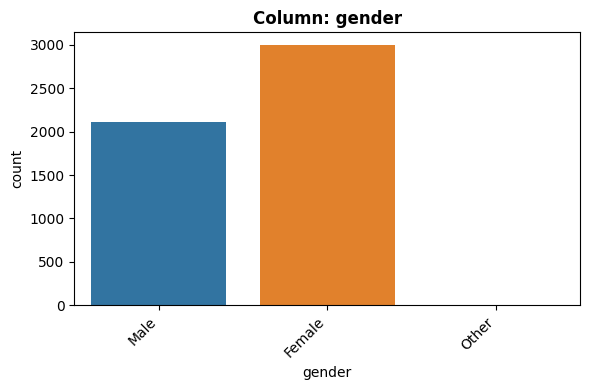

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.


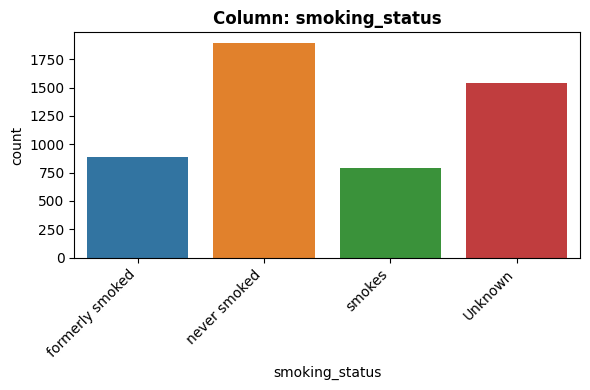

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.


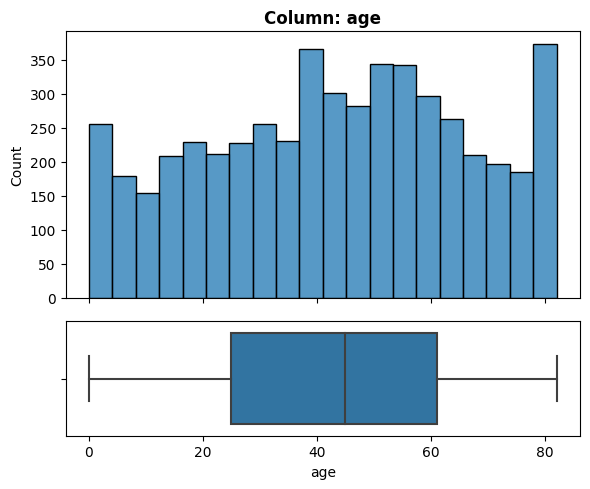

- NaN's Found: 0 (0.0%)
- Unique Values: 104
- Most common value: '78.0' occurs 102 times (2.0%)
- Not constant or quasi-constant.


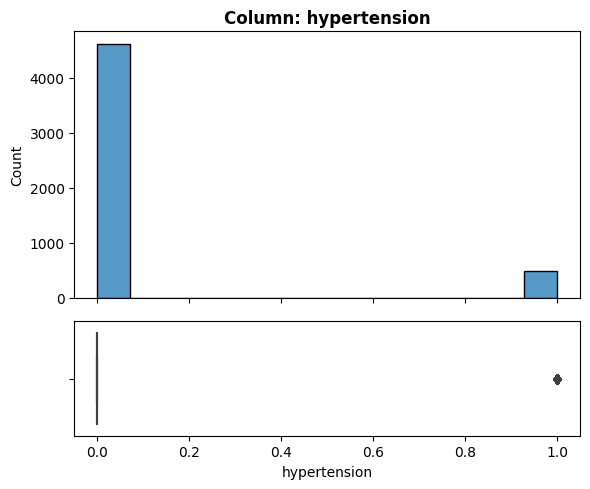

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4612 times (90.25%)
- Not constant or quasi-constant.


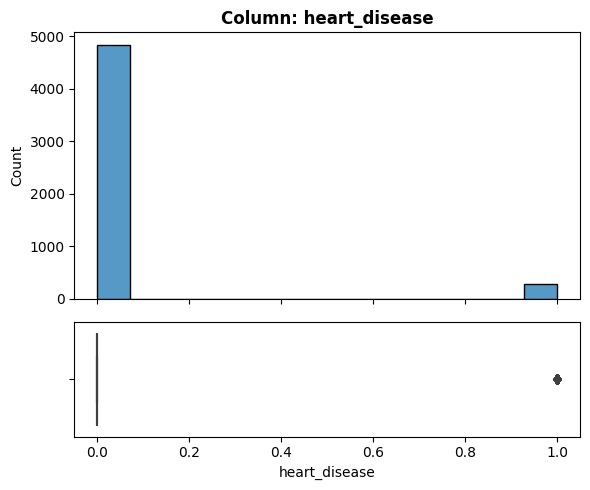

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4834 times (94.6%)
- Not constant or quasi-constant.


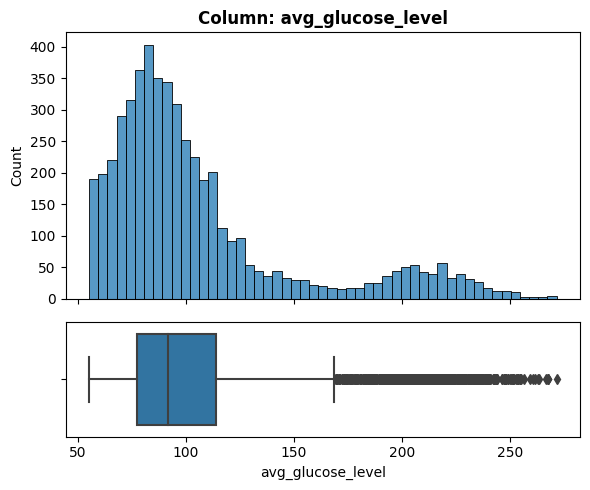

- NaN's Found: 0 (0.0%)
- Unique Values: 3979
- Most common value: '93.88' occurs 6 times (0.12%)
- Not constant or quasi-constant.


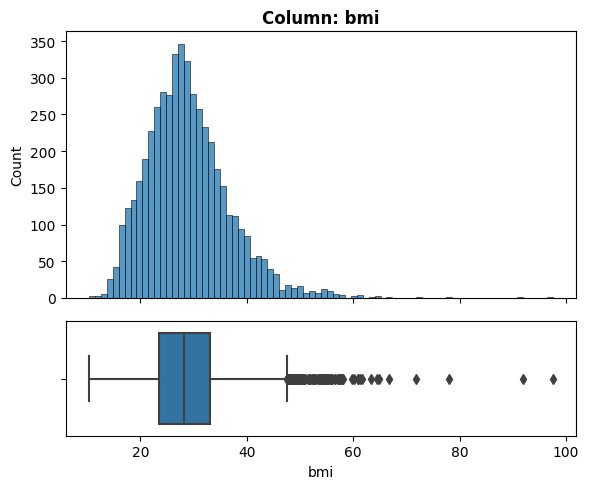

- NaN's Found: 201 (3.93%)
- Unique Values: 418
- Most common value: 'nan' occurs 201 times (3.93%)
- Not constant or quasi-constant.


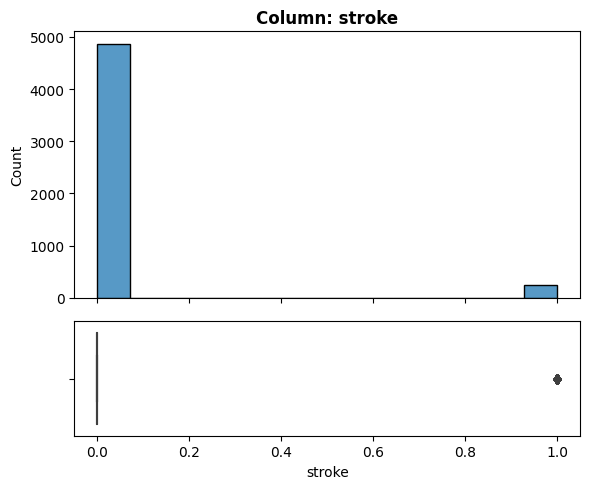

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4861 times (95.13%)
- Not constant or quasi-constant.


In [119]:
#Checking for impossible values by looking at outliers and exploring the data
explore_categorical(df,"gender");
explore_categorical(df,"smoking_status");
explore_numeric(df, "age");
explore_numeric(df, "hypertension");
explore_numeric(df, "heart_disease");
explore_numeric(df, "avg_glucose_level");
explore_numeric(df, "bmi");
explore_numeric(df, "stroke");


**Interpretation**
- Drop record with Gender ="Other" as the model will not learn from this data
- BMI over 80 might be impossible values


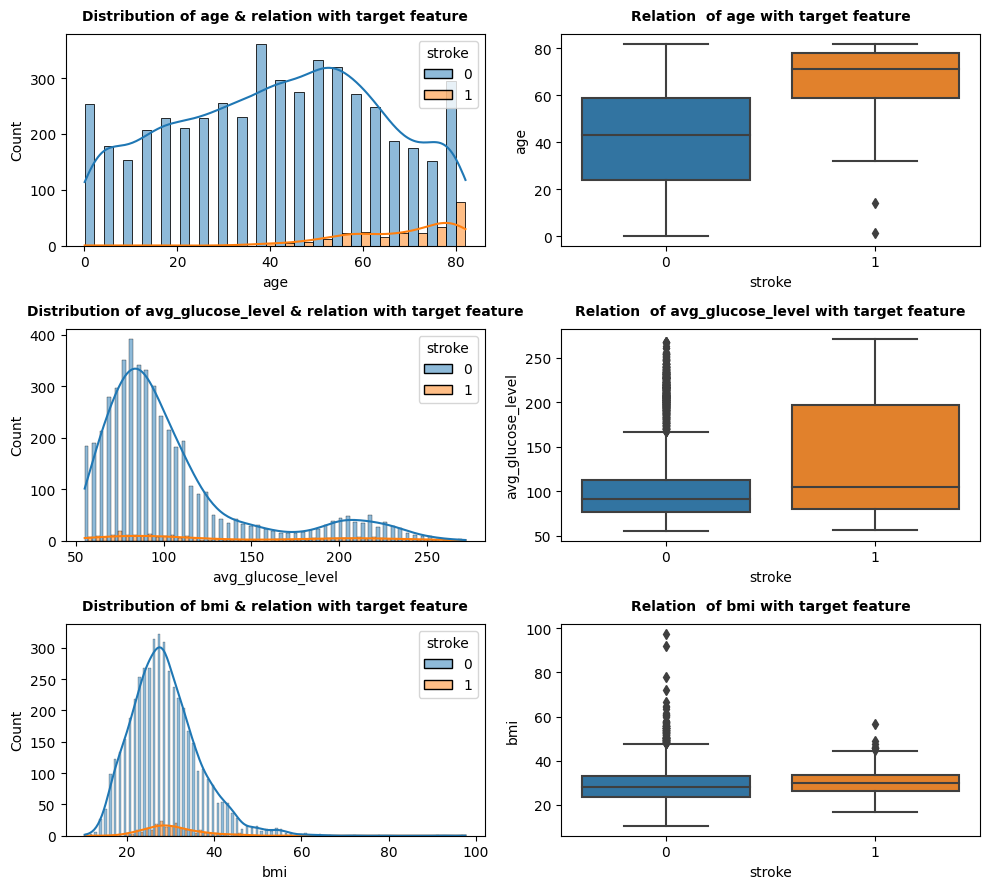

In [120]:
#Bivariate Analysis to understand how the data relates to the target
#Create Column Array
con_num=['age', 'avg_glucose_level', 'bmi',]

dist_box_plot(df, con_num);

**Interpretation**
- The older population has higher stroke counts
- No useful insights from glucose and bmi

###Drop data

In [121]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [122]:
#Drop other from Gender
df.drop(df[df['gender'] == "Other"].index, inplace=True)

#If your applying the Analysis to adults only based on discussion with Client, you can drop ages < 18
#Remove age values less than 9 as per industry standard of testing from 9years old and up
df.drop(df[df['age'] < 9].index, inplace=True)


In [123]:
#Check Gender Data
df['gender'].value_counts()

Female    2785
Male      1890
Name: gender, dtype: int64

In [124]:
#Check Age data
df['age'].value_counts()

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
       ... 
77.0     42
74.0     40
9.0      38
11.0     36
10.0     35
Name: age, Length: 74, dtype: int64

In [125]:
#Check min and max
df['age'].describe()

count    4675.000000
mean       46.884706
std        20.025416
min         9.000000
25%        31.000000
50%        48.000000
75%        62.000000
max        82.000000
Name: age, dtype: float64

In [126]:
#Use label encoder on categorical data
#le = preprocessing.LabelEncoder()

# Convert the object columns to label encoded columns
#for col in ["smoking_status", "gender"]:
#    df[col] = le.fit_transform(df[col])

#dataframe_encoded = df[["gender", "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status", "stroke"]]

#print(dataframe_encoded)

#**5. Preparing the data for modeling**
## Define target and features and train-test-split<br>